In [ ]:
import pandas as pd
try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from sklearn.metrics import roc_auc_score,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import seaborn as sns

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 9.8MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219248 sha256=b24f408f486207330e8ceac20759deba9e47b6374be6d615d205477bac572ca9
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [ ]:

def load_data(randomize=False):
    try:
        with open("/content/drive/MyDrive/ML_Data/hyppi-train.pkl", "rb") as fh:
          df_train = pickle.load(fh)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open("/content/drive/MyDrive/ML_Data/hyppi-independent.pkl", "rb") as fh:
          df_test = pickle.load(fh)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data()
print('The data used will be:')
df_train[['Joined']]

The data used will be:


,Joined
0,"[M, K, D, K, Q, K, K, K, K, E, R, T, W, A, E, ..."
1,"[M, S, W, S, G, L, L, H, G, L, N, T, S, L, T, ..."
2,"[M, S, L, F, D, L, F, R, G, F, F, G, F, P, G, ..."
3,"[M, A, V, A, P, R, L, F, G, G, L, C, F, R, F, ..."
4,"[M, S, T, I, Q, S, E, T, D, C, Y, D, I, I, E, ..."
...,...
6265,"[M, S, Y, F, G, E, H, F, W, G, E, K, N, H, G, ..."
6266,"[M, T, V, G, K, S, S, K, M, L, Q, H, I, D, Y, ..."
6267,"[M, N, N, L, S, F, S, E, L, C, C, L, F, C, C, ..."
6268,"[M, A, P, E, I, N, L, P, G, P, M, S, L, I, D, ..."


Median length of Joined sequence is 881


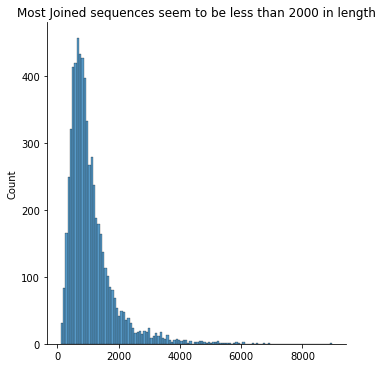

In [ ]:
rows = df_train['Joined'].shape[0]
lengths = sorted(len(s) for s in df_train['Joined'])
print("Median length of Joined sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Joined sequences seem to be less than 2000 in length")

MAX_VOCAB_SIZE is 1000
MAX_SEQUENCE_LENGTH is 2000
max sequence_data length: 8966
min sequence_data length: 107
median sequence_data length: 881


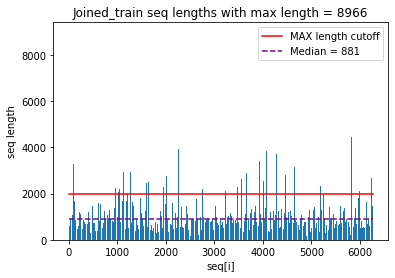

max word index: 20
Found 20 unique tokens.
Center padding.
Shape of data tensor: (6270, 2000)
max sequences_test length: 6126
min sequences_test length: 134
median sequences_test length: 901


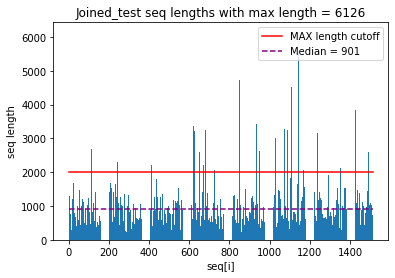

Center padding for test seq.
Shape of data_test tensor: (1514, 2000)
num_words is 21


In [19]:
data_1D_join,data_test_1D_join,num_words_1D_join,MAX_SEQUENCE_LENGTH_1D,MAX_VOCAB_SIZE_1D = f.get_seq_data_join(1000,2000,df_train,df_test, pad = 'center', show=True)

In [ ]:
EMBEDDING_DIM_1D = 5
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 20
M_1D=10



ip = Input(shape=(MAX_SEQUENCE_LENGTH_1D,),name = 'model1D_join_ip')
x = f.embedding_layer(num_words_1D_join,MAX_SEQUENCE_LENGTH_1D,EMBEDDING_DIM_1D)(ip)
x = Bidirectional(LSTM(M_1D, return_sequences=True))(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = GlobalMaxPool1D()(x)
output = Dense(1, activation="sigmoid")(x)

model1D_join = Model(ip, output)
model1D_join.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'],
)


jk = model1D_join.fit(data_1D_join,df_train['label'].values,batch_size=BATCH_SIZE,epochs=EPOCHS)
print(roc_auc_score(df_test['label'].values, model1D_join.predict(data_test_1D_join)))

Epoch 1/20
49/49 [==============================] - 11s 173ms/step - loss: 0.6940 - accuracy: 0.5329
Epoch 2/20
49/49 [==============================] - 9s 177ms/step - loss: 0.6663 - accuracy: 0.5789
Epoch 3/20
49/49 [==============================] - 9s 179ms/step - loss: 0.6471 - accuracy: 0.6131
Epoch 4/20
49/49 [==============================] - 9s 179ms/step - loss: 0.6228 - accuracy: 0.6537
Epoch 5/20
49/49 [==============================] - 9s 179ms/step - loss: 0.6175 - accuracy: 0.6617
Epoch 6/20
49/49 [==============================] - 9s 179ms/step - loss: 0.6329 - accuracy: 0.6410
Epoch 7/20
49/49 [==============================] - 9s 179ms/step - loss: 0.6117 - accuracy: 0.6528
Epoch 8/20
49/49 [==============================] - 9s 179ms/step - loss: 0.6101 - accuracy: 0.6657
Epoch 9/20
49/49 [==============================] - 9s 179ms/step - loss: 0.6302 - accuracy: 0.6417
Epoch 10/20
49/49 [==============================] - 9s 179ms/step - loss: 0.5897 - accuracy: 0.679

In [ ]:
data_1D_join,data_test_1D_join,num_words_1D_join,MAX_SEQUENCE_LENGTH_1D,MAX_VOCAB_SIZE_1D = f.get_seq_data_join(1000,2000,df_train,df_test, pad = 'pre')

MAX_VOCAB_SIZE is 1000
MAX_SEQUENCE_LENGTH is 2000
max sequence_data length: 8966
min sequence_data length: 107
median sequence_data length: 881
max word index: 20
Found 20 unique tokens.
pre padding.
Shape of data tensor: (6270, 2000)
max sequences_test length: 6126
min sequences_test length: 134
median sequences_test length: 901
pre padding for test seq.
Shape of data_test tensor: (1514, 2000)
num_words is 21


In [ ]:
EMBEDDING_DIM_1D = 5
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 20
M_1D=10



ip = Input(shape=(MAX_SEQUENCE_LENGTH_1D,),name = 'model1D_join_ip')
x = f.embedding_layer(num_words_1D_join,MAX_SEQUENCE_LENGTH_1D,EMBEDDING_DIM_1D)(ip)
x = Bidirectional(LSTM(M_1D, return_sequences=True))(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = GlobalMaxPool1D()(x)
output = Dense(1, activation="sigmoid")(x)

model1D_join = Model(ip, output)
model1D_join.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'],
)


jk = model1D_join.fit(data_1D_join,df_train['label'].values,batch_size=BATCH_SIZE,epochs=EPOCHS)
print(roc_auc_score(df_test['label'].values, model1D_join.predict(data_test_1D_join)))

Epoch 1/20
49/49 [==============================] - 11s 176ms/step - loss: 0.6895 - accuracy: 0.5332
Epoch 2/20
49/49 [==============================] - 9s 178ms/step - loss: 0.6475 - accuracy: 0.6173
Epoch 3/20
49/49 [==============================] - 9s 178ms/step - loss: 0.6472 - accuracy: 0.6090
Epoch 4/20
49/49 [==============================] - 9s 179ms/step - loss: 0.6495 - accuracy: 0.6211
Epoch 5/20
49/49 [==============================] - 9s 179ms/step - loss: 0.6253 - accuracy: 0.6451
Epoch 6/20
49/49 [==============================] - 9s 179ms/step - loss: 0.6277 - accuracy: 0.6332
Epoch 7/20
49/49 [==============================] - 9s 179ms/step - loss: 0.6265 - accuracy: 0.6394
Epoch 8/20
49/49 [==============================] - 9s 179ms/step - loss: 0.6209 - accuracy: 0.6508
Epoch 9/20
49/49 [==============================] - 9s 180ms/step - loss: 0.6134 - accuracy: 0.6554
Epoch 10/20
49/49 [==============================] - 9s 180ms/step - loss: 0.6124 - accuracy: 0.664

In [ ]:
data_1D_join,data_test_1D_join,num_words_1D_join,MAX_SEQUENCE_LENGTH_1D,MAX_VOCAB_SIZE_1D = f.get_seq_data_join(1000,2000,df_train,df_test, pad = 'post')

MAX_VOCAB_SIZE is 1000
MAX_SEQUENCE_LENGTH is 2000
max sequence_data length: 8966
min sequence_data length: 107
median sequence_data length: 881
max word index: 20
Found 20 unique tokens.
post padding.
Shape of data tensor: (6270, 2000)
max sequences_test length: 6126
min sequences_test length: 134
median sequences_test length: 901
post padding for test seq.
Shape of data_test tensor: (1514, 2000)
num_words is 21


In [ ]:
EMBEDDING_DIM_1D = 5
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 20
M_1D=10



ip = Input(shape=(MAX_SEQUENCE_LENGTH_1D,),name = 'model1D_join_ip')
x = f.embedding_layer(num_words_1D_join,MAX_SEQUENCE_LENGTH_1D,EMBEDDING_DIM_1D)(ip)
x = Bidirectional(LSTM(M_1D, return_sequences=True))(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = GlobalMaxPool1D()(x)
output = Dense(1, activation="sigmoid")(x)

model1D_join = Model(ip, output)
model1D_join.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'],
)


jk = model1D_join.fit(data_1D_join,df_train['label'].values,batch_size=BATCH_SIZE,epochs=EPOCHS)
print(roc_auc_score(df_test['label'].values, model1D_join.predict(data_test_1D_join)))

Epoch 1/20
49/49 [==============================] - 11s 174ms/step - loss: 0.6818 - accuracy: 0.5495
Epoch 2/20
49/49 [==============================] - 9s 175ms/step - loss: 0.6684 - accuracy: 0.5668
Epoch 3/20
49/49 [==============================] - 9s 178ms/step - loss: 0.6553 - accuracy: 0.6050
Epoch 4/20
49/49 [==============================] - 9s 177ms/step - loss: 0.6678 - accuracy: 0.5880
Epoch 5/20
49/49 [==============================] - 9s 178ms/step - loss: 0.6441 - accuracy: 0.6297
Epoch 6/20
49/49 [==============================] - 9s 179ms/step - loss: 0.6243 - accuracy: 0.6422
Epoch 7/20
49/49 [==============================] - 9s 179ms/step - loss: 0.6364 - accuracy: 0.6233
Epoch 8/20
49/49 [==============================] - 9s 179ms/step - loss: 0.6265 - accuracy: 0.6359
Epoch 9/20
49/49 [==============================] - 9s 179ms/step - loss: 0.6167 - accuracy: 0.6528
Epoch 10/20
49/49 [==============================] - 9s 179ms/step - loss: 0.6104 - accuracy: 0.656

In [ ]:
#model1D_join.save('/content/drive/MyDrive/ML_Data/model1D_join.h5')